Step 1: Data Preparation

a. Load and Normalize the Dataset

Normalize the pixel values (in this case, feature values) between 0 and 1.

Split the data into training (80%) and testing (20%) sets.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, f1_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the feature values to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


Step 2: RBM Implementation
a. Define the RBM

We'll use PyTorch to define and train the RBM. Choose the number of visible units to be the number of features in the dataset (4 for the Iris dataset), and set the hidden units to 128.

In [ ]:
# Binarize the data (convert to 0s and 1s)
binarizer = Binarizer(threshold=0.5)
X_train_binarized = binarizer.fit_transform(X_train)
X_test_binarized = binarizer.transform(X_test)

# Update RBM hyperparameters
hidden_units =  25 # Reduce the number of hidden units
learning_rate = 0.01  # Adjust learning rate
n_iter = 500  # Increase the number of iterations for better training

# Re-initialize RBM with updated parameters
rbm = BernoulliRBM(n_components=hidden_units, learning_rate=learning_rate, n_iter=n_iter, random_state=42)

# Train the RBM on binarized data
rbm.fit(X_train_binarized)

BernoulliRBM(learning_rate=0.01, n_components=25, n_iter=500, random_state=42)

In [ ]:
X_train_features = rbm.transform(X_train)
X_test_features = rbm.transform(X_test)

Step 4: Visualization

Visualizing the weight matrix of the RBM as a grid is a little tricky since the Iris dataset features are not image data. But you can visualize the weights if they were in an image-like format (e.g., with image datasets).

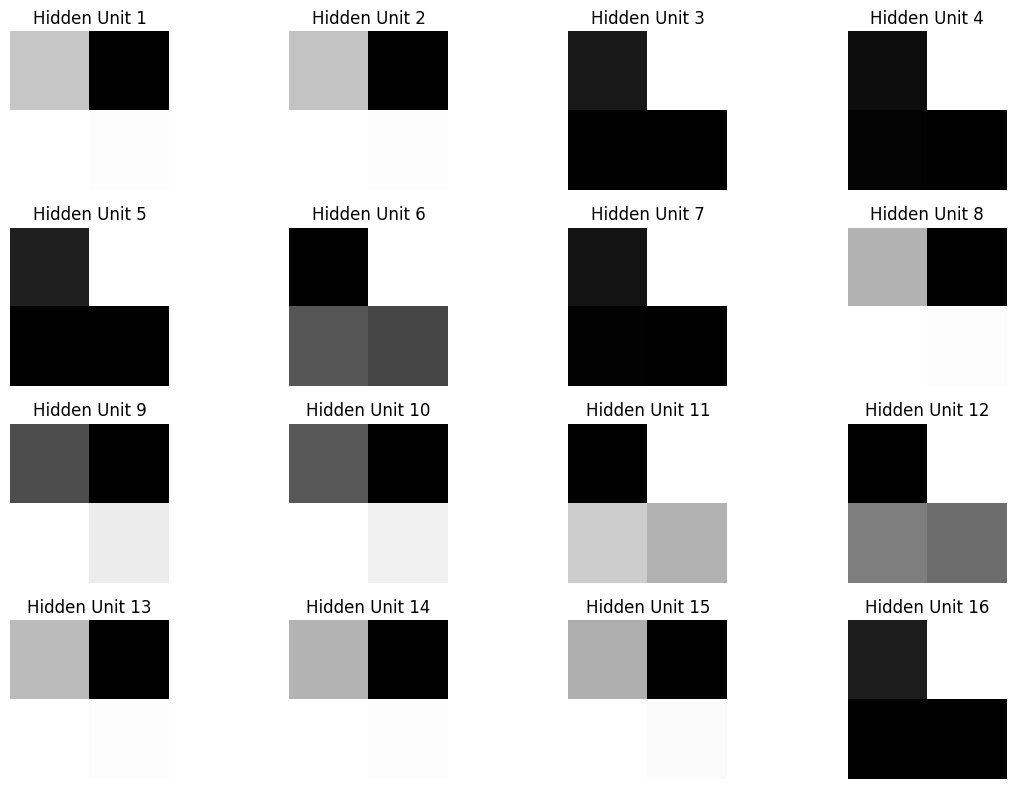

In [ ]:
import matplotlib.pyplot as plt

# Visualize the weight matrix
def visualize_weights(rbm):
    # Get the weights from the RBM model
    weights = rbm.components_

    # Plot the weights (each row corresponds to a hidden unit)
    plt.figure(figsize=(12, 8))
    for i, weight in enumerate(weights[:16]):  # Visualize first 16 weights
        plt.subplot(4, 4, i + 1)
        plt.imshow(weight.reshape(2, 2), cmap='gray')  # Reshape if applicable, here it's a placeholder
        plt.title(f'Hidden Unit {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_weights(rbm)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Train a Logistic Regression classifier on RBM-extracted features
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train_features, y_train)

# Test the classifier
y_pred = classifier.predict(X_test_features)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy using RBM features: {accuracy:.4f}")
print(f"F1 Score using RBM features: {f1:.4f}")


Accuracy using RBM features: 0.9333
F1 Score using RBM features: 0.9319


In [ ]:
# Train and evaluate classifier on raw data
classifier_raw = LogisticRegression(max_iter=200)
classifier_raw.fit(X_train, y_train)
y_pred_raw = classifier_raw.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred_raw)
f1_raw = f1_score(y_test, y_pred_raw, average='weighted')

print(f"Accuracy using raw data: {accuracy_raw:.4f}")
print(f"Accuracy using RBM features: {accuracy:.4f}")

print(f"F1 Score using raw data: {f1_raw:.4f}")
print(f"F1 Score using RBM features: {f1:.4f}")


Accuracy using raw data: 0.9667
Accuracy using RBM features: 0.9333
F1 Score using raw data: 0.9664
F1 Score using RBM features: 0.9319
